In [156]:
%matplotlib inline
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
#titanic_dataset

In [139]:
titanic = pd.read_csv('titanic.csv')

In [140]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [146]:
titanic.describe()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,443.000000,0.354002,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,256.199141,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,221.500000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,443.000000,0.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,664.500000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,886.000000,1.000000,80.000000,8.000000,6.000000,512.32920


In [142]:
titanic['Sex'] = pd.factorize(titanic['Sex'])[0]
titanic['Name'] = pd.factorize(titanic['Name'])[0]

In [143]:
titanic[['Sex', 'Name']].describe()

,Sex,Name
count,887.000000,887.000000
mean,0.354002,443.000000
std,0.478480,256.199141
min,0.000000,0.000000
25%,0.000000,221.500000
50%,0.000000,443.000000
75%,1.000000,664.500000
max,1.000000,886.000000


In [144]:
%matplotlib inline
import seaborn as sns

In [150]:
titanic = titanic.drop('Name', axis=1)

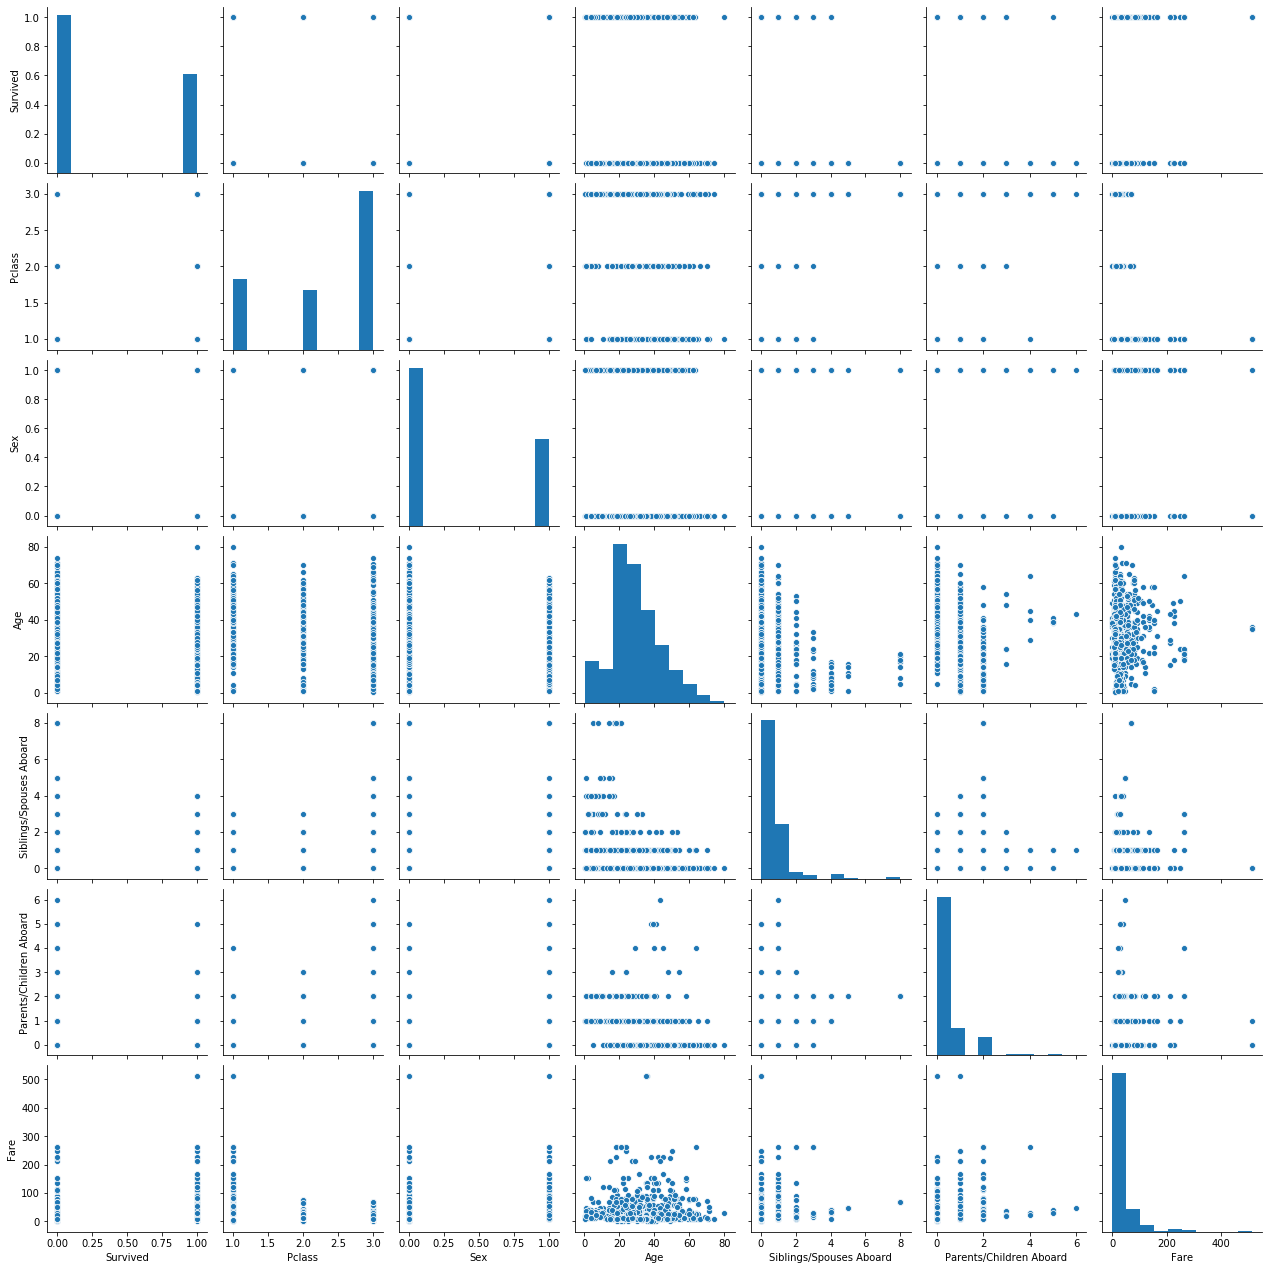

In [151]:
sns.pairplot(titanic)

In [19]:
titanic['log_fare'] = np.log(titanic['Fare'])

Text(0, 0.5, 'Survived')

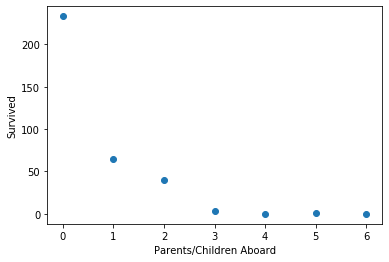

In [167]:
d_f = titanic[['Si'', 'Survived']].groupby('Parents/Children Aboard', as_index=False).sum()
plt.scatter(d_f['Parents/Children Aboard'], d_f['Survived'])
plt.xlabel('Parents/Children Aboard')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

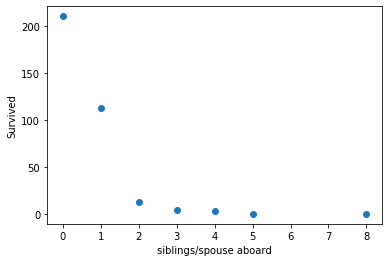

In [175]:
d_f = titanic[['Siblings/Spouses Aboard', 'Survived']].groupby('Siblings/Spouses Aboard', as_index=False).sum()
plt.scatter(d_f['Siblings/Spouses Aboard'], d_f['Survived'])
plt.xlabel('siblings/spouse aboard')
plt.ylabel('Survived')

In [24]:
from scipy.special import logit

In [176]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


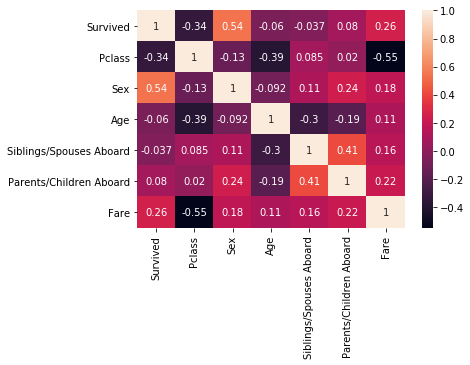

In [179]:
sns.heatmap(titanic.corr(), annot=True)

In [17]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_numeric
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0


In [188]:
titanic = titanic.sample(len(titanic)).reset_index(drop=True)

In [206]:
titanic['Pclass_Sex'] = titanic[['Pclass', 'Sex']].apply(lambda x: str(x[0])+'_'+str(x[1]), axis=1)
titanic['Pclass_Sex'] = pd.factorize(titanic['Pclass_Sex'])[0]

In [207]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_Sex
0,0,3,0,-0.507316,0,0,-0.481158,0
1,1,3,1,-0.794142,1,0,-0.336344,1
2,0,3,0,-0.865849,8,2,0.714289,0
3,0,3,0,-0.650729,0,0,-0.484155,0
4,1,2,1,1.357056,1,2,0.625846,2


In [208]:
train = titanic[:700]
test = titanic[700:]

In [191]:
mean_fare = train['Fare'].mean()
std_fare = train['Fare'].std()

mean_age = train['Age'].mean()
std_age = train['Age'].std()

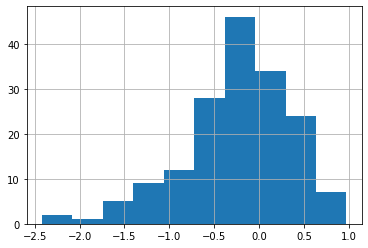

In [209]:
np.log10(train['Fare']).hist()

In [192]:
train['Fare'] = (train['Fare'] - mean_fare) / std_fare
test['Fare'] = (test['Fare'] - mean_fare) / std_fare

train['Age'] = (train['Age'] - mean_age) / std_age
test['Age'] = (test['Fare'] - mean_age) / std_age

/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [210]:
train.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_Sex
0,0,3,0,-0.507316,0,0,-0.481158,0
1,1,3,1,-0.794142,1,0,-0.336344,1
2,0,3,0,-0.865849,8,2,0.714289,0
3,0,3,0,-0.650729,0,0,-0.484155,0
4,1,2,1,1.357056,1,2,0.625846,2


In [211]:
test.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_Sex
700,1,3,1,-2.119805,0,0,-0.487314,1
701,0,3,0,-2.119805,0,0,-0.487314,0
702,1,2,1,-2.113370,0,0,-0.397574,2
703,1,1,1,-1.813449,0,0,3.785033,3
704,1,2,1,-2.076224,1,1,0.120453,2


In [301]:
with pm.Model() as log_model:

    a = pm.Normal(name='intercept',mu = 0.0, tau = 1/float(10)**2)
    b_class = pm.Normal(name='b_class',mu = 0.0, tau = 1/float(10)**2)
    b_sex = pm.Normal(name='b_sex', mu = 0.0, tau = 1/float(10)**2)
    b_class_sex =  pm.Normal(name='b_class_sex', mu = 0.0, tau = 1/float(10)**2)
    b_sibling = pm.Normal(name='b_sibling', mu = 0.0, tau = 1/float(10)**2)
    b_child = pm.Normal(name='b_child', mu = 0.0, tau = 1/float(10)**2)
    b_fare = pm.Normal(name='b_fare', mu = 0.0, tau = 1/float(10)**2)
    b_age = pm.Normal(name='b_age', mu = 0.0, tau = 1/float(10)**2)
    
    yhat = a + (b_class * train['Pclass']) + (b_sex * train['Sex']) + b_sibling * train['Siblings/Spouses Aboard'] + b_child * train['Parents/Children Aboard'] + b_fare * train['Fare'] + b_age * train['Age'] + (b_class_sex * train['Pclass_Sex'])
    
    #yhat = a + b_age * train['Age'] + b_fare * train['Fare'] +b_sex * train['Sex_numeric'] + b_fare * train['log_fare']
    theta = pm.math.sigmoid(yhat)
    y = pm.Bernoulli('y', p =theta, observed=train['Survived'].values)
    
    trc_fish = pm.sample(5000, chains=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [b_age, b_fare, b_child, b_sibling, b_class_sex, b_sex, b_class, intercept]
Sampling 3 chains, 0 divergences: 100%|██████████| 16500/16500 [01:10<00:00, 235.37draws/s]
The acceptance probability does not match the target. It is 0.8859708413881479, but should be close to 0.8. Try to increase the number of tuning steps.


In [302]:
trc_fish = trc_fish[1000:]

/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not ef

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x140e04190>,
      dtype=object)

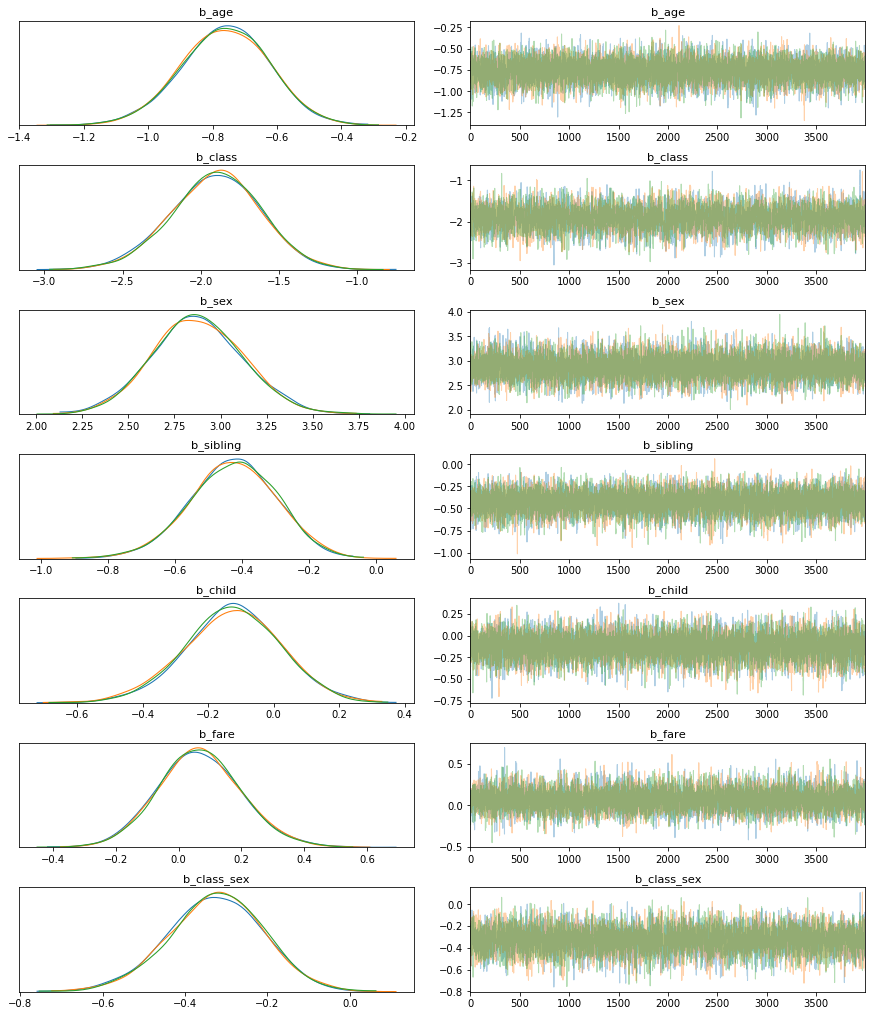

In [263]:
pm.traceplot(trc_fish, var_names=['b_age', 'b_class', 'b_sex', 'b_sibling','b_child', 'b_fare', 'b_class_sex'])

In [303]:
ppc = pm.sample_posterior_predictive(trc_fish, model=log_model, samples=100)

/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 100/100 [00:00<00:00, 452.14it/s]


In [ ]:
from scipy.stats import beta

In [ ]:
_, ax = plt.subplots(figsize=(12, 6))

β = st.beta((ppc['y'] == 1).sum(axis=0), (ppc['y'] == 0).sum(axis=0))

# estimated probability
ax.scatter(x=predictors_out_of_sample, y=β.mean())

# error bars on the estimate
plt.vlines(predictors_out_of_sample, *β.interval(0.95))

# actual outcomes
ax.scatter(x=predictors_out_of_sample,
           y=outcomes_out_of_sample, marker='x')

# True probabilities
x = np.linspace(predictors_out_of_sample.min(), predictors_out_of_sample.max())
ax.plot(x, invlogit(x), linestyle='-')


ax.set_xlabel('predictor')
ax.set_ylabel('outcome');

(array([454.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 246.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

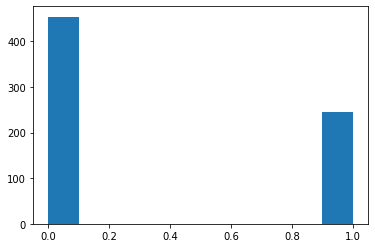

In [313]:
plt.hist(ppc['y'][99])

In [266]:
pm.gelman_rubin(trc_fish)

/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/pymc3/stats/__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")


<xarray.Dataset>
Dimensions:      ()
Data variables:
    intercept    float64 1.001
    b_class      float64 1.001
    b_sex        float64 1.0
    b_class_sex  float64 1.001
    b_sibling    float64 1.0
    b_child      float64 1.001
    b_fare       float64 1.0
    b_age        float64 1.0

In [271]:
pm.summary(trc_fish)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,3.546,0.825,2.076,5.215,0.012,0.008,4971.0,4711.0,5019.0,5766.0,1.0
b_class,-1.909,0.283,-2.443,-1.382,0.004,0.003,4956.0,4772.0,5023.0,6236.0,1.0
b_sex,2.874,0.242,2.436,3.347,0.002,0.002,11328.0,11328.0,11299.0,8097.0,1.0
b_class_sex,-0.327,0.114,-0.547,-0.118,0.002,0.001,5626.0,5574.0,5655.0,7037.0,1.0
b_sibling,-0.428,0.128,-0.672,-0.194,0.001,0.001,10453.0,9711.0,10555.0,8196.0,1.0
b_child,-0.127,0.146,-0.400,0.151,0.001,0.001,9873.0,7052.0,9944.0,8082.0,1.0
b_fare,0.066,0.131,-0.183,0.311,0.001,0.001,8966.0,5476.0,9096.0,6833.0,1.0
b_age,-0.763,0.135,-1.016,-0.509,0.001,0.001,9602.0,9376.0,9637.0,7879.0,1.0


In [272]:
yhat = trc_fish['intercept'].mean() + (trc_fish['b_age'].mean() * test['Age']) + \
(trc_fish['b_class'].mean() * test['Pclass']) + \
(trc_fish['b_sex'].mean() * test['Sex']) + \
(trc_fish['b_sibling'].mean() * (test['Siblings/Spouses Aboard']) + \
(trc_fish['b_child'].mean() * test['Parents/Children Aboard'])) + \
trc_fish['b_fare'].mean() * test['Fare'] + \
trc_fish['b_class_sex'].mean() * test['Pclass_Sex']

test_pred = 1 / (1 + np.exp(-1 *(yhat)))

In [273]:
yhat = trc_fish['intercept'].mean() + (trc_fish['b_age'].mean() * train['Age']) + \
(trc_fish['b_class'].mean() * train['Pclass']) + \
(trc_fish['b_sex'].mean() * train['Sex']) + \
(trc_fish['b_sibling'].mean() * (train['Siblings/Spouses Aboard']) + \
(trc_fish['b_child'].mean() * train['Parents/Children Aboard'])) + \
trc_fish['b_fare'].mean() * train['Fare'] + \
trc_fish['b_class_sex'].mean() * train['Pclass_Sex']  
train_pred = 1 / (1 + np.exp(-1 *(yhat)))

In [274]:
train_Accuracy =((train_pred>0.5).astype(np.int) == train['Survived']).mean()
model_accuracy = ((test_pred>0.5).astype(np.int) == test['Survived']).mean()
print(train_Accuracy, model_accuracy)

0.8128571428571428 0.7700534759358288


In [282]:
train['Pred'] = np.round(train_pred)

/Users/ahmedaleshinloye/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
train[train['Pred'] != train['Survived']]

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_Sex,Pred
11,0,1,0,-0.579023,0,1,0.864692,4,1.0
20,1,2,0,-2.036818,1,1,-0.355782,5,0.0
23,0,3,1,-0.077076,0,0,-0.479457,1,1.0
24,1,3,0,0.209750,0,0,-0.483588,0,0.0
26,1,1,0,1.141936,0,0,-0.121552,4,0.0
...,...,...,...,...,...,...,...,...,...
676,1,1,0,0.496576,0,0,-0.124711,4,0.0
678,1,2,0,-1.511209,1,1,0.076717,5,0.0
679,0,3,1,-1.869742,3,1,-0.227976,1,1.0
681,0,3,1,-0.292196,1,0,-0.483588,1,1.0


In [275]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

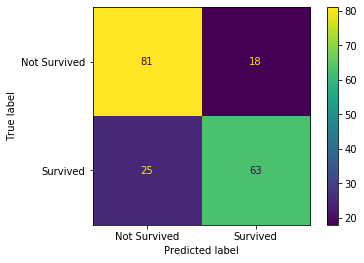

In [281]:
ConfusionMatrixDisplay(confusion_matrix(np.round(test_pred), test['Survived']), np.array(['Not Survived','Survived'])).plot()

In [119]:
(post_pred>0.5).sum()

185